<a href="https://colab.research.google.com/github/Srinidhireddy25/AIML-2025/blob/main/2303A51566_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assessing Mathematical Learning in Higher Education


 Q1: Identify the Math topic which is most hard to learn?

 Q2: List the top5 math sub-topics for the students?

 Q3. Identify the questions level most solved by the students?

  Q4: Name the country with most solved math problems?
  
  Q5: List top 10 keywords related to math topics most searched for?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the Dataset**

In [ ]:
import pandas as pd

file_path_mat = '/content/drive/MyDrive/aiml lab exam/student-mat.csv'
file_path_por = '/content/drive/MyDrive/aiml lab exam/student-por.csv'

d1 = pd.read_csv(file_path_mat, sep=";")
d2 = pd.read_csv(file_path_por, sep=";")

d3 = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu",
                          "Mjob", "Fjob", "reason", "nursery", "internet"])

print("Number of students in the merged dataset:", d3.shape[0])

Number of students in the merged dataset: 382


**1 Identify the Top 5 Reasons for Low Performance**

In [ ]:
low_performance = d3[d3['G3_x'] <= 10]

correlations = low_performance.corr(numeric_only=True)['G3_x'].sort_values()
top_5_reasons = correlations.head(5)

print("Top 5 reasons for low performance:")
print(top_5_reasons)

Top 5 reasons for low performance:
failures_x   -0.211138
absences_y   -0.128092
failures_y   -0.117119
age          -0.085657
health_x     -0.043318
Name: G3_x, dtype: float64


**2 Count Students with Both Parents Employed**

In [ ]:
both_employed = d3[(d3['Mjob'] != 'at_home') & (d3['Fjob'] != 'at_home')]
print("Number of students with both parents employed:", len(both_employed))

Number of students with both parents employed: 320


**3 Find Maximum and Minimum Age**

In [ ]:
max_age = d3['age'].max()
min_age = d3['age'].min()
print("Maximum age:", max_age)
print("Minimum age:", min_age)

Maximum age: 22
Minimum age: 15


**4 Determine the Most Used Medium of Instruction**

In [ ]:
most_used_medium = d3['school'].value_counts().idxmax()
print("Most used medium of instruction:", most_used_medium)

Most used medium of instruction: GP


**5 Analyze the Role of Extra-Curricular Activities**

In [ ]:
activity_impact = d3.groupby('activities_x')['G3_x'].mean()
print("Impact of extra-curricular activities on performance:\n", activity_impact)

Impact of extra-curricular activities on performance:
 activities_x
no     10.182320
yes    10.572139
Name: G3_x, dtype: float64


**Claasification Or Clustering**

**6.1 Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = d3.drop(['G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y'], axis=1)
X = pd.get_dummies(X, drop_first=True)

y = d3['G3_x'] >= 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy of the model: {accuracy:.2f}%")

Accuracy of the model: 89.57%


 **6.2 Clustering**

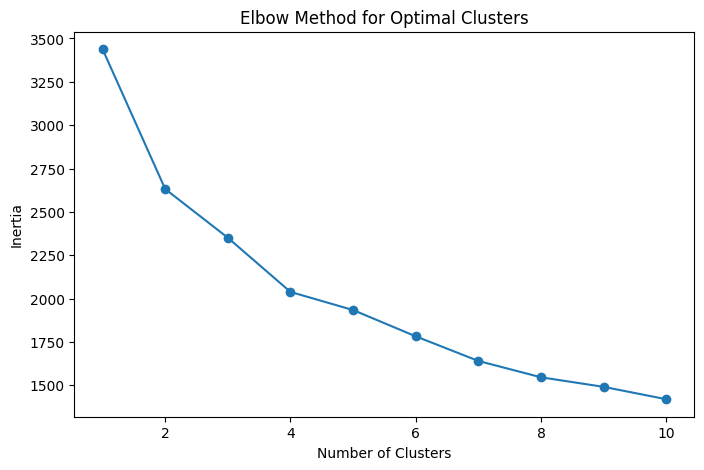

Cluster labels assigned:
    Cluster  G3_x
0        0     6
1        0     6
2        0    10
3        1    15
4        2    10


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numeric_features = ['age', 'Medu', 'Fedu', 'studytime_x', 'failures_x', 'absences_x', 'G1_x', 'G2_x', 'G3_x']
data_for_clustering = d3[numeric_features]

data_for_clustering = data_for_clustering.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

d3['Cluster'] = cluster_labels
print("Cluster labels assigned:\n", d3[['Cluster', 'G3_x']].head())